In [1]:
from environment import Environment
from agent import Agent
from trainer import Final_variational_trainer, Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters

In [3]:
N = 5000 # Number of episodes

In [4]:
savefigs = False

In [5]:
# Agent/Environment initialization

In [6]:
env = Environment.bottleneck(initial_state_range=0)

#agent = Agent(GAMMA = 1)
offPolicy = True
monte_carlo=True
isTime=True
#BETA=100

OBS_LEAK = 1e-2 # ETA
ALPHA = 3e-1 #1e-1 
augmentation = False
PREC = 3e-2 #0.1 # LAMBDA

do_reward = True #False #

NB_TRIALS = 10

mem_total_reward_OFF = {}
nb_visits_final_OFF = {}
mem_total_reward = {}
nb_visits_final = {}

for offPolicy in [True, False]:
    if offPolicy:
        BETA = 1e-6
    else:
        BETA= 100
    for trial in range(NB_TRIALS):
        agent = Agent(env,
                      ALPHA=ALPHA,
                      GAMMA=1, # Episodic agent!
                      BETA=BETA, 
                      #Q_VAR_MULT=0.1,
                      PREC=PREC,
                      do_reward=do_reward,
                      isTime=isTime,    #!! TimeAgent
                      offPolicy=offPolicy) 

        if not offPolicy:
            #trainer = one_step_variational_trainer(agent)
            trainer = Final_variational_trainer(agent, 
                                                monte_carlo=monte_carlo, 
                                                final= True,
                                                augmentation=augmentation,
                                                OBS_LEAK=OBS_LEAK,
                                                ref_prob='unif') #[2,5] # 
        else:
            trainer = Q_learning_trainer(agent,
                                         monte_carlo=monte_carlo)

        for i in range(N):
            trainer.run_episode()
            if i%100 == 0:
                print(i)
                print("Trajectory: ", trainer.trajectory)
                print("Total reward got: %.4f" % trainer.total_reward)
            
        if offPolicy:
            mem_total_reward_OFF[trial] = trainer.mem_total_reward
            nb_visits_final_OFF[trial] = trainer.nb_visits_final
        else:
            mem_total_reward[trial] = trainer.mem_total_reward
            nb_visits_final[trial] = trainer.nb_visits_final
        
    


0
Trajectory:  [0, 0, 0, 0, 6, 7, 6, 7]
Total reward got: 0.0000
100
Trajectory:  [0, 6, 0, 0, 1, 1, 1, 1]
Total reward got: 0.0000
200
Trajectory:  [0, 0, 0, 6, 6, 6, 7, 13]
Total reward got: 0.0000
300
Trajectory:  [0, 6, 7, 1, 0, 0, 0, 0]
Total reward got: 0.0000
400
Trajectory:  [0, 0, 0, 0, 1, 0, 0, 1]
Total reward got: 0.0000
500
Trajectory:  [0, 6, 12, 13, 7, 1, 0, 6]
Total reward got: 0.0000
600
Trajectory:  [0, 0, 6, 0, 1, 2, 2, 8]
Total reward got: 0.0000
700
Trajectory:  [0, 0, 1, 7, 1, 7, 8, 2]
Total reward got: 0.0000
800
Trajectory:  [0, 1, 7, 8, 9, 10, 4, 5]
Total reward got: 0.0000
900
Trajectory:  [0, 1, 7, 8, 9, 10, 16, 10]
Total reward got: 0.0000
1000
Trajectory:  [0, 1, 7, 8, 9, 10, 16, 17]
Total reward got: 1.0000
1100
Trajectory:  [0, 1, 7, 8, 9, 10, 16, 17]
Total reward got: 1.0000
1200
Trajectory:  [0, 1, 7, 8, 9, 15, 15, 16]
Total reward got: 0.0000
1300
Trajectory:  [0, 1, 7, 8, 9, 10, 16, 17]
Total reward got: 1.0000
1400
Trajectory:  [0, 1, 7, 8, 9, 10, 9, 

1900
Trajectory:  [0, 0, 1, 2, 8, 7, 1, 7]
Total reward got: 0.0000
2000
Trajectory:  [0, 6, 6, 12, 12, 12, 13, 14]
Total reward got: 0.0000
2100
Trajectory:  [0, 6, 6, 6, 0, 1, 0, 0]
Total reward got: 0.0000
2200
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
2300
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
2400
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
2500
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
2600
Trajectory:  [0, 1, 7, 13, 14, 14, 13, 13]
Total reward got: 0.0000
2700
Trajectory:  [0, 1, 2, 8, 14, 14, 14, 14]
Total reward got: 0.0000
2800
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
2900
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3000
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3100
Trajectory:  [0, 1, 2, 8, 9, 10, 9, 15]
Total reward got: 0.0000
3200
Trajectory:  [0, 1, 2, 8, 9, 10, 9, 15]
Total reward got: 0.0000
3300
Traj

3700
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
3800
Trajectory:  [0, 1, 1, 2, 2, 8, 9, 10]
Total reward got: 0.0000
3900
Trajectory:  [0, 1, 7, 8, 9, 15, 15, 16]
Total reward got: 0.0000
4000
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4100
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4200
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4300
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4400
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4500
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4600
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4700
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4800
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4900
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
0
Trajectory:  [0, 0, 0, 0, 1, 1, 2, 8]
Total reward got: 0.0000
100
Trajectory

500
Trajectory:  [0, 6, 6, 7, 6, 0, 0, 1]
Total reward got: 0.0000
600
Trajectory:  [0, 1, 7, 8, 7, 1, 2, 8]
Total reward got: 0.0000
700
Trajectory:  [0, 1, 7, 1, 2, 2, 2, 8]
Total reward got: 0.0000
800
Trajectory:  [0, 1, 7, 13, 14, 14, 14, 14]
Total reward got: 0.0000
900
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
1000
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
1100
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
1200
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
1300
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
1400
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 11]
Total reward got: 0.0000
1500
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
1600
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
1700
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
1800
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
1900
Trajectory:  

2500
Trajectory:  [0, 6, 6, 6, 0, 0, 6, 0]
Total reward got: 0.0000
2600
Trajectory:  [0, 6, 12, 6, 0, 0, 6, 7]
Total reward got: 0.0000
2700
Trajectory:  [0, 0, 0, 0, 6, 7, 13, 13]
Total reward got: 0.0000
2800
Trajectory:  [0, 0, 0, 6, 12, 12, 12, 6]
Total reward got: 0.0000
2900
Trajectory:  [0, 0, 0, 0, 6, 6, 6, 0]
Total reward got: 0.0000
3000
Trajectory:  [0, 0, 0, 6, 12, 13, 7, 13]
Total reward got: 0.0000
3100
Trajectory:  [0, 0, 0, 6, 0, 6, 12, 12]
Total reward got: 0.0000
3200
Trajectory:  [0, 0, 0, 0, 0, 0, 0, 6]
Total reward got: 0.0000
3300
Trajectory:  [0, 1, 1, 7, 6, 6, 7, 13]
Total reward got: 0.0000
3400
Trajectory:  [0, 0, 0, 1, 7, 8, 2, 2]
Total reward got: 0.0000
3500
Trajectory:  [0, 1, 1, 0, 1, 0, 6, 12]
Total reward got: 0.0000
3600
Trajectory:  [0, 1, 1, 7, 6, 7, 13, 7]
Total reward got: 0.0000
3700
Trajectory:  [0, 1, 0, 6, 0, 6, 7, 6]
Total reward got: 0.0000
3800
Trajectory:  [0, 0, 0, 0, 1, 2, 2, 2]
Total reward got: 0.0000
3900
Trajectory:  [0, 0, 6, 12, 12

4200
Trajectory:  [0, 1, 2, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4300
Trajectory:  [0, 1, 2, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4400
Trajectory:  [0, 1, 2, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4500
Trajectory:  [0, 1, 2, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4600
Trajectory:  [0, 1, 2, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4700
Trajectory:  [0, 1, 2, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4800
Trajectory:  [0, 1, 2, 8, 9, 15, 16, 17]
Total reward got: 1.0000
4900
Trajectory:  [0, 1, 2, 8, 9, 15, 16, 17]
Total reward got: 1.0000
0
Trajectory:  [0, 6, 12, 12, 12, 6, 7, 8]
Total reward got: 0.0000
100
Trajectory:  [0, 6, 7, 8, 14, 8, 9, 10]
Total reward got: 0.0000
200
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
300
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
400
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
500
Trajectory:  [0, 1, 7, 8, 9, 10, 11, 17]
Total reward got: 1.0000
600
Trajectory:

900
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1000
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1100
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1200
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1300
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1400
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1500
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1600
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1700
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1800
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
1900
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
2000
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
2100
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
2200
Trajectory:  [0, 1, 7, 8, 9, 15, 16, 17]
Total reward got: 1.0000
2300
Tr

2500
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
2600
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
2700
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
2800
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
2900
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3000
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3100
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3200
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3300
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3400
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3500
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3600
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3700
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3800
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
3900
T

4200
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
4300
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
4400
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
4500
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
4600
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
4700
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
4800
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
4900
Trajectory:  [0, 1, 2, 8, 9, 10, 11, 17]
Total reward got: 1.0000
0
Trajectory:  [0, 0, 1, 1, 0, 0, 0, 6]
Total reward got: 0.0000
100
Trajectory:  [0, 1, 1, 0, 0, 1, 0, 1]
Total reward got: 0.0000
200
Trajectory:  [0, 1, 7, 8, 14, 14, 14, 14]
Total reward got: 0.0000
300
Trajectory:  [0, 0, 0, 1, 2, 8, 7, 13]
Total reward got: 0.0000
400
Trajectory:  [0, 6, 7, 13, 13, 14, 14, 14]
Total reward got: 0.0000
500
Trajectory:  [0, 0, 6, 0, 1, 7, 1, 2]
Total reward got: 0.0000
600
Trajectory:  [0, 1

In [7]:
agent.Q_ref_tab

array([[1.00000000e+00, 5.08316340e-45, 1.51140544e-28, 8.10968518e-28],
       [1.00000000e+00, 4.48973843e-28, 3.06394675e-30, 7.61722631e-50],
       [1.27521234e-43, 1.00000000e+00, 2.17638104e-26, 6.12192248e-30],
       [1.00000000e+00, 3.27252868e-32, 6.94462751e-30, 1.31744867e-32],
       [3.97917172e-45, 1.00000000e+00, 6.71579074e-32, 2.97035804e-35],
       [1.00000000e+00, 3.92968868e-40, 1.39957361e-28, 4.72995877e-30],
       [1.00000000e+00, 5.55733758e-43, 2.87049575e-31, 1.61575170e-27]])

In [8]:
act_probs=agent.epsilon_greedy(0, actions_set=None)

In [9]:
agent.offPolicy

False

In [10]:
np.random.choice(agent.N_act, p=act_probs)

0

In [11]:
np.random.uniform(size=(env.N_obs, env.N_act))

array([[0.13521243, 0.65487706, 0.06578691, 0.00711699],
       [0.11528422, 0.69899059, 0.05720681, 0.41750664],
       [0.88386161, 0.2443912 , 0.2461707 , 0.52530663],
       [0.25916074, 0.57625138, 0.56864618, 0.95176087],
       [0.91781526, 0.58198932, 0.30439956, 0.25531064],
       [0.37765077, 0.87761743, 0.59067279, 0.33254004],
       [0.69458897, 0.42527962, 0.83183523, 0.28467556],
       [0.92182051, 0.67238312, 0.68567513, 0.78582683],
       [0.04708041, 0.91598122, 0.45312373, 0.7194137 ],
       [0.01977288, 0.16023932, 0.20765003, 0.30653166],
       [0.45988566, 0.4071596 , 0.60608771, 0.77086455],
       [0.63982896, 0.07461978, 0.66137862, 0.99740013],
       [0.13274227, 0.13473223, 0.76418135, 0.13318659],
       [0.65693484, 0.78884585, 0.49261201, 0.55977908],
       [0.35983127, 0.73781886, 0.81798868, 0.63871152],
       [0.19067407, 0.76266922, 0.72465544, 0.92262084],
       [0.22844277, 0.44196604, 0.47468189, 0.77997091],
       [0.80565589, 0.13579627,

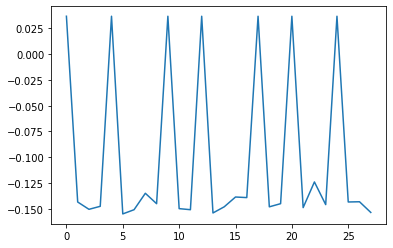

In [12]:
plt.plot(agent.Q_var_tab.flatten())

In [13]:
trainer.calc_state_probs()

array([9.61616397e-131, 1.38586144e-001, 1.39986004e-001, 5.72236110e-139,
       2.86103606e-139, 0.00000000e+000, 8.67028495e-131, 1.61289696e-130,
       1.41400004e-001, 1.42828287e-001, 2.20059923e-131, 1.36979429e-133,
       2.88079394e-131, 1.05137627e-130, 1.83830511e-130, 1.44270997e-001,
       1.45728280e-001, 1.47200283e-001])

In [14]:
trainer.calc_ref_probs(agent.get_observation())

array([0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556,
       0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556,
       0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556,
       0.05555556, 0.05555556, 0.05555556])

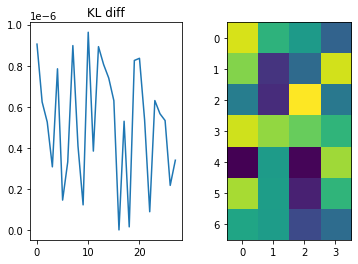

In [15]:
#print('KL_diff', agent.Q_KL_tab)
plt.subplot(1,2,1)
plt.plot(agent.Q_KL_tab.flatten())
plt.title('KL diff')
plt.subplot(1,2,2)
plt.imshow(agent.Q_KL_tab)

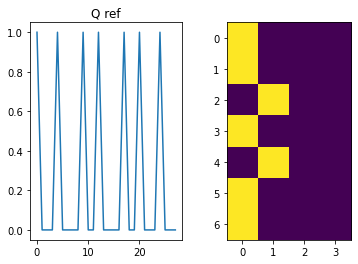

In [16]:
plt.subplot(1,2,1)
plt.plot(agent.Q_ref_tab.flatten())
plt.title('Q ref')
plt.subplot(1,2,2)
plt.imshow(agent.Q_ref_tab)

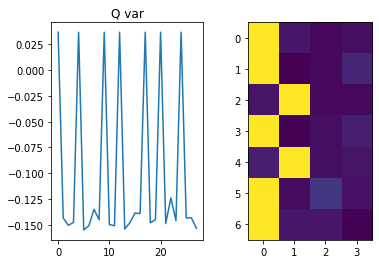

In [17]:
plt.subplot(1,2,1)
plt.plot(agent.Q_var_tab.flatten())
plt.title('Q var')
plt.subplot(1,2,2)
plt.imshow(agent.Q_var_tab)

In [18]:
#nb_visits_1 = trainer.nb_visits_final
#nb_visits_2 = trainer.nb_visits_final
trial=0
v_min=0
v_max = 0.16

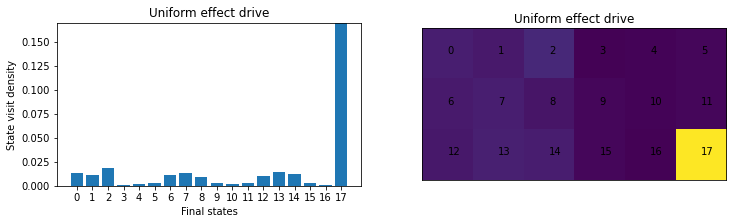

In [19]:
plt.figure(figsize = (12,3))
ax = plt.subplot(1,2,1)
plt.bar(range(env.N_obs), nb_visits_final[trial] / N)
ax.set_xticks(range(18))
plt.xlabel('Final states')
plt.ylabel('State visit density')
plt.ylim([0,0.17])
plt.title('Uniform effect drive')

ax = plt.subplot(1,2,2)
plt.imshow(nb_visits_final[trial].reshape(3,6)/ N, vmin=v_min, vmax=v_max)
for j in range(6):
    for i in range(3):
        plt.text(j,i,6*i+j)

ax.set_xticks([])
ax.set_yticks([])
plt.title('Uniform effect drive')

if savefigs:
    plt.savefig('botteneck-uniform-drive.png', bbox_inches='tight')

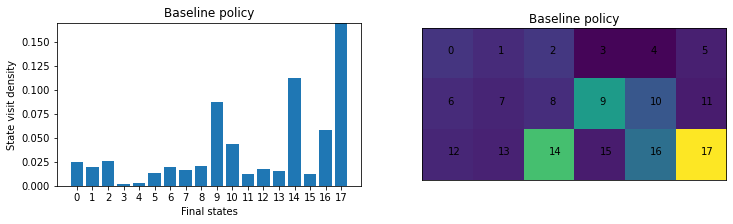

In [20]:
#print(trainer.nb_visits_final)
plt.figure(figsize = (12,3))
ax = plt.subplot(1,2,1)
plt.bar(range(env.N_obs), nb_visits_final_OFF[trial]/ N)
ax.set_xticks(range(18))
plt.xlabel('Final states')
plt.ylabel('State visit density')
plt.ylim([0,0.17])
plt.title('Baseline policy')

ax = plt.subplot(1,2,2)
plt.imshow(nb_visits_final_OFF[trial].reshape(3,6)/ N, vmin=v_min, vmax=v_max)
for j in range(6):
    for i in range(3):
        plt.text(j,i,6*i+j)

ax.set_xticks([])
ax.set_yticks([])
plt.title('Baseline policy')

if savefigs:
    plt.savefig('botteneck-baseline.png')

In [21]:
#mem_total_reward_1 = trainer.mem_total_reward

In [22]:
#mem_total_reward_B100_01 = trainer.mem_total_reward
#mem_total_reward = mem_total_reward_B100_01


0
1
2
3
4
5
6
7
8
9


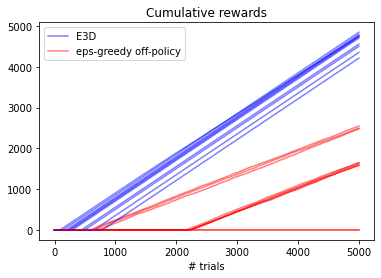

In [23]:
for trial in range(NB_TRIALS):
    print(trial)
    if trial == 0:
        plt.plot(np.cumsum(mem_total_reward[trial]), alpha=0.5, label='E3D', color='blue')
    else:
        plt.plot(np.cumsum(mem_total_reward[trial]), alpha=0.5, color='blue')
    if trial == 0:
        plt.plot(np.cumsum(mem_total_reward_OFF[trial]), alpha=0.5, label='eps-greedy off-policy', color='red')
    else:
        plt.plot(np.cumsum(mem_total_reward_OFF[trial]), alpha=0.5, color='red')
    plt.legend()
    plt.title('Cumulative rewards')
    plt.xlabel('# trials')
    
if savefigs:
    plt.savefig('training-comparison.png', bbox_inches='tight')


In [24]:
#mem_obs_final_1 = trainer.mem_obs_final

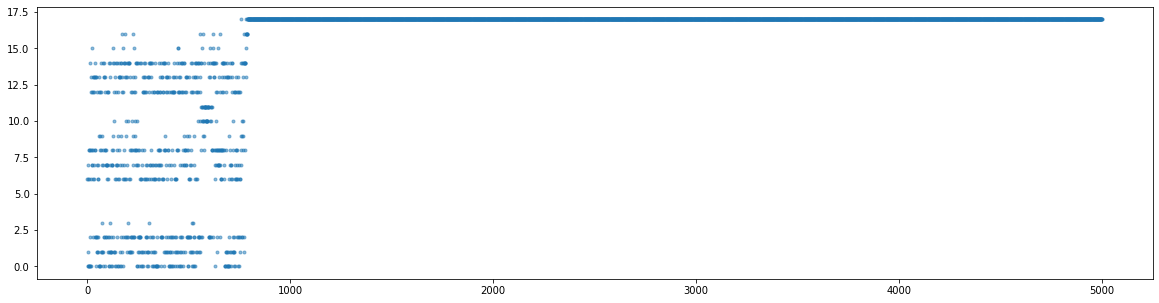

In [25]:
plt.figure(figsize=(20,5))
plt.plot(trainer.mem_obs_final, '.', alpha=0.5)

KeyError: 250

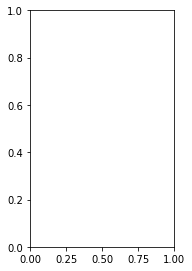

In [26]:
plt.figure(figsize=(15,20))
for i in range(1, 21):
    plt.subplot(4,5,i)
    plt.imshow(trainer.mem_V[i * N//20].reshape(3,6))

In [ ]:
plt.plot(trainer.mem_V[2000])

In [ ]:
trainer.monte_carlo